pandas Series

In [1]:
import pandas as pd

In [3]:
a = pd.Series([82,75,73,89,79])

In [4]:
a.describe()

count     5.000000
mean     79.600000
std       6.308724
min      73.000000
25%      75.000000
50%      79.000000
75%      82.000000
max      89.000000
dtype: float64

In [5]:
print(a[3])

89


In [6]:
for i in a:
    print(i)

82
75
73
89
79


In [7]:
print(a-5)

0    77
1    70
2    68
3    84
4    74
dtype: int64


In [8]:
print(a>80)

0     True
1    False
2    False
3     True
4    False
dtype: bool


In [9]:
print(a.mean())

79.6


In [10]:
# 计算同向和反向特征的元素个数

def dir_judge(var1, var2):
    mean1 = var1.mean()
    mean2 = var2.mean()
    
    same_dir = ((var1 > mean1)&(var2 > mean2)) | ((var1 < mean1)&(var2 < mean2))
    print(same_dir)
    return(len(same_dir[same_dir == True]),len(same_dir[same_dir == False]))



In [11]:
math_score = pd.Series([143,137,141,130,136,128,139])
eng_score = pd.Series([73,82,75,76,65,89,67])

dir_judge(math_score,eng_score)

0    False
1     True
2    False
3    False
4     True
5    False
6    False
dtype: bool


(2, 5)

索引

series为列表和字典的结合

In [12]:
math_score = pd.Series([143,137,141,130,136,128,139],
                index = ['ZQ','ZZX','YSC','WDF','SZY','XJL','XJY'])
math_score

ZQ     143
ZZX    137
YSC    141
WDF    130
SZY    136
XJL    128
XJY    139
dtype: int64

In [13]:
math_score.describe()

count      7.000000
mean     136.285714
std        5.529144
min      128.000000
25%      133.000000
50%      137.000000
75%      140.000000
max      143.000000
dtype: float64

In [14]:
math_score.loc['ZZX']  #索引

137

In [15]:
math_score.iloc[2]   #位置

141

In [16]:
math_score[2]

141

In [17]:
math_score.idxmax()

'ZQ'

向量计算

In [18]:
math_score = pd.Series([143,137,141,130,136,128,139],
                index = ['ZQ','ZZX','YSC','WDF','SZY','XJL','XJY'])
eng_score = pd.Series([73,82,75,76,65,89,67],
                     index = ['ZQ','ZZX','YSC','WDF','SZY','XJL','XJY'])

In [19]:
math_score + eng_score

ZQ     216
ZZX    219
YSC    216
WDF    206
SZY    201
XJL    217
XJY    206
dtype: int64

In [20]:
pol_score = pd.Series([73,71,65,70,67,68,60],
                     index = ['ZZX','YSC','ZQ','WDF','XJY','XJL','SZY'])

In [21]:
pol_score + math_score + eng_score  # 根据索引相加

SZY    261
WDF    276
XJL    285
XJY    273
YSC    287
ZQ     281
ZZX    292
dtype: int64

In [22]:
pro_score = pd.Series([150,100,140,130,120,110,119],
                     index =  ['ZQ','MD','AD','CD','ZZ','RNG','XJY'])

In [23]:
pro_score + pol_score

AD       NaN
CD       NaN
MD       NaN
RNG      NaN
SZY      NaN
WDF      NaN
XJL      NaN
XJY    186.0
YSC      NaN
ZQ     215.0
ZZ       NaN
ZZX      NaN
dtype: float64

apply

In [24]:
pol_score = pd.Series([73,71,65,70,67,68,60])

In [25]:
def multi(num):
    return num * 2

In [26]:
pol_score.apply(multi)

0    146
1    142
2    130
3    140
4    134
5    136
6    120
dtype: int64

In [27]:
pol_score * 2

0    146
1    142
2    130
3    140
4    134
5    136
6    120
dtype: int64

In [28]:
def multi_big(num):
    if num > 70:
        return num * 2

In [29]:
pol_score.apply(multi_big)

0    146.0
1    142.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
dtype: float64

# 缺失值填充

去除NAN:Not a Number


In [32]:
pro_score = pd.Series([150,100,140,130,120,110,119],
                     index =  ['ZQ','MD','AD','CD','ZZ','RNG','XJY'])
pol_score = pd.Series([73,71,65,70,67,68,60],
                     index = ['ZZX','YSC','ZQ','WDF','XJY','XJL','SZY'])

In [33]:
pro_score + pol_score

AD       NaN
CD       NaN
MD       NaN
RNG      NaN
SZY      NaN
WDF      NaN
XJL      NaN
XJY    186.0
YSC      NaN
ZQ     215.0
ZZ       NaN
ZZX      NaN
dtype: float64

dropna

In [34]:
(pro_score + pol_score).dropna()  
# 直接去除NAN值

XJY    186.0
ZQ     215.0
dtype: float64

fillna

In [36]:
(pro_score + pol_score).fillna(0)  
# 将NAN值填充为一个常数

AD       0.0
CD       0.0
MD       0.0
RNG      0.0
SZY      0.0
WDF      0.0
XJL      0.0
XJY    186.0
YSC      0.0
ZQ     215.0
ZZ       0.0
ZZX      0.0
dtype: float64

add

In [38]:
pro_score.add(pol_score, fill_value= 0) 
# 以pro_score为基础加上pol_score，无对应项相当于加0

AD     140.0
CD     130.0
MD     100.0
RNG    110.0
SZY     60.0
WDF     70.0
XJL     68.0
XJY    186.0
YSC     71.0
ZQ     215.0
ZZ     120.0
ZZX     73.0
dtype: float64

# 绘图

In [49]:
# pol_score = pd.Series([73,71,65,70,67,68,60],
#                      index = ['ZZX','YSC','ZQ','WDF','XJY','XJL','SZY'],
#                      name = 'politics scores in GRE')
import numpy as np
pol_score = pd.Series(np.random.randn(100)+65,name = 'politics scores in GRE')

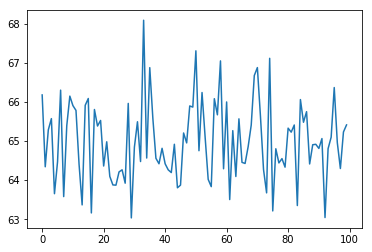

In [50]:
pol_score.plot(kind = 'line')
# kind = 'bar','hist','box'

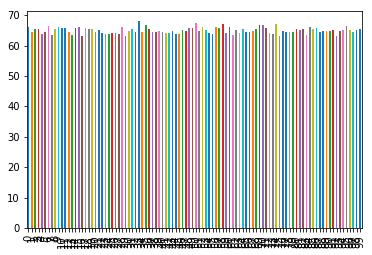

In [51]:
pol_score.plot.bar()

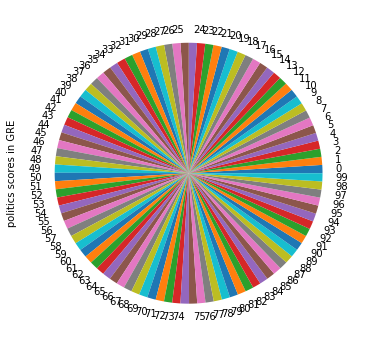

In [57]:
pol_score.plot.pie(figsize = (6,6))

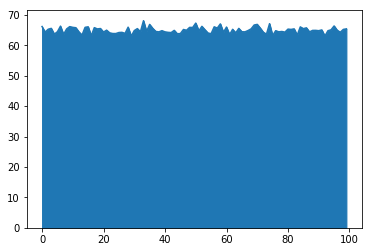

In [53]:
pol_score.plot.area()

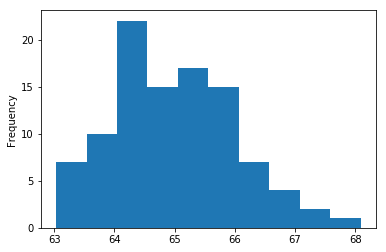

In [54]:
pol_score.plot.hist()

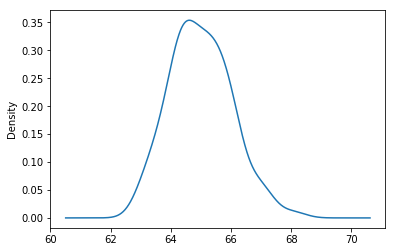

In [55]:
pol_score.plot.kde()
# 密度图

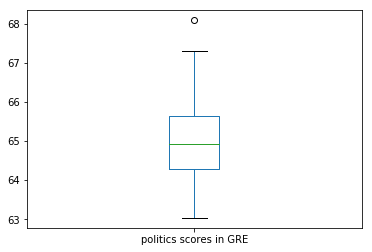

In [56]:
pol_score.plot.box()

# DataFrame

In [10]:
import numpy as np
gre_scores_np = np.array([
    ['name','pol','eng','math','stat'],
    ['zzx',73,82,137,114,],
    ['zq',65,73,143,150,],
    ['ysc',71,75,141,94,],
    ['xjy',67,67,139,119,],
    ['xjl',68,89,128,115,],
])

In [11]:
gre_scores_np.dtype
# 全转为字符串

dtype('<U4')

###  使用dataframe

In [6]:
import pandas as pd

gre_scores = pd.DataFrame({
    'name':['zzx','zq','ysc','xjy','xjl'],
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
})

gre_scores


,name,pol,eng,math,stat
0,zzx,73,82,137,114
1,zq,65,73,143,150
2,ysc,71,75,141,94
3,xjy,67,67,139,119
4,xjl,68,89,128,115


In [7]:
gre_scores.mean()
# 按列求均值，识别数字型数据

pol      68.8
eng      77.2
math    137.6
stat    118.4
dtype: float64

In [8]:
gre_scores.sum(axis=1)

0    406
1    431
2    381
3    392
4    400
dtype: int64

In [9]:
gre_scores.max()

name    zzx
pol      73
eng      89
math    143
stat    150
dtype: object

### np,pd求std 

In [12]:
gre_scores.std()

pol      3.193744
eng      8.497058
math     5.813777
stat    20.156885
dtype: float64

In [14]:
gre_scores_np = np.array([
    [73,82,137,114,],
    [65,73,143,150,],
    [71,75,141,94,],
    [67,67,139,119,],
    [68,89,128,115,],
])
gre_scores_np.std(axis=0)

array([ 2.85657137,  7.6       ,  5.2       , 18.02886574])

np求std的值比pd小

In [17]:
a = np.array([range(10)])
print(a)
print(a.std())

[[0 1 2 3 4 5 6 7 8 9]]
2.8722813232690143


In [19]:
np.sqrt(((a-np.mean(a))**2).sum() / (a.size - 1)) #校正除以n-1

3.0276503540974917

In [20]:
np.sqrt(((a-np.mean(a))**2).sum() / (a.size))

2.8722813232690143

In [25]:
b = pd.DataFrame([0,1,2,3,4,5,6,7,8,9])
print(b)

   0
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


In [26]:
b.std()
# pandas 默认作贝塞尔校正即计算样本标准差

0    3.02765
dtype: float64

In [27]:
b.std(ddof = 0) # 计算总体标准差

0    2.872281
dtype: float64

## 读取df元素 

In [28]:
print(gre_scores)

  name  pol  eng  math  stat
0  zzx   73   82   137   114
1   zq   65   73   143   150
2  ysc   71   75   141    94
3  xjy   67   67   139   119
4  xjl   68   89   128   115


In [29]:
import pandas as pd

gre_scores = pd.DataFrame({
    
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
},index = ['zzx','zq','ysc','xjy','xjl'],)

gre_scores


,pol,eng,math,stat
zzx,73,82,137,114
zq,65,73,143,150
ysc,71,75,141,94
xjy,67,67,139,119
xjl,68,89,128,115


In [30]:
gre_scores.loc['zzx']
# 通过自设标签

pol      73
eng      82
math    137
stat    114
Name: zzx, dtype: int64

In [31]:
gre_scores.iloc[0]
# 通过索引

pol      73
eng      82
math    137
stat    114
Name: zzx, dtype: int64

In [32]:
gre_scores['stat']

zzx    114
zq     150
ysc     94
xjy    119
xjl    115
Name: stat, dtype: int64

In [33]:
type(gre_scores.loc['zzx'])
# Series

pandas.core.series.Series

In [35]:
gre_scores['stat'].idxmax()

'zq'

In [37]:
gre_scores.loc[gre_scores['stat'].idxmax()]

pol      65
eng      73
math    143
stat    150
Name: zq, dtype: int64

In [39]:
gre_scores.loc[gre_scores['stat'].idxmax()].sum()
# 找出专业课最高的同学的总成绩

431

In [40]:
gre_scores.values.mean()
# 计算所有值的均值

100.5

In [45]:
gre_scores['stat'].idxmax()

'zq'

In [48]:
gre_scores.loc[gre_scores['stat'].idxmax()].sum()

431

'math'

## 加载CSV到DataFrame

In [2]:
import pandas as pd

In [4]:
import os
print("1111")
print (os.getcwd())#获得当前目录
print (os.path.abspath('.'))#获得当前工作目录
print (os.path.abspath('..'))#获得当前工作目录的父目录
print (os.path.abspath(os.curdir))#获得当前工作目录


1111
C:\Users\14284\Documents\numpy\Numpy-Pandas
C:\Users\14284\Documents\numpy\Numpy-Pandas
C:\Users\14284\Documents\numpy
C:\Users\14284\Documents\numpy\Numpy-Pandas


In [11]:
gre_ruc = pd.read_csv('./data/gre_ruc.csv',encoding = 'utf-8')

In [13]:
# gre_ruc
gre_ruc.describe()

,num,firscore,secscore,totalscore
count,5.900000e+01,59.000000,59.000000,59.000000
mean,1.000291e+14,395.084746,286.135593,79.837458
std,6.871298e+03,9.938237,13.740774,2.073498
min,1.000291e+14,368.000000,252.000000,73.120000
25%,1.000291e+14,388.000000,276.500000,78.430000
50%,1.000291e+14,393.000000,286.000000,79.530000
75%,1.000291e+14,400.500000,293.000000,81.280000
max,1.000291e+14,426.000000,317.000000,85.180000


In [14]:
gre_ruc = pd.read_csv('./data/gre_ruc.csv',encoding = 'utf-8',index_col = 'name')

In [15]:
gre_ruc

,num,firscore,secscore,totalscore
name,,,,
张碧莹,100029111514436,426,298,85.18
卢子腾,100029111515802,411,316,84.63
王馨韬,100029111502996,415,308,84.50
崔楚乔,100029111512680,417,290,83.24
马宁,100029111503009,404,309,83.05
张浩博,100029111503068,398,317,82.89
吴昆,100029111519527,407,301,82.78
林家嗣,100029111520953,393,316,82.11
程明远,100029111515743,408,291,82.06


In [16]:
gre_ruc['totalscore']

name
张碧莹    85.18
卢子腾    84.63
王馨韬    84.50
崔楚乔    83.24
马宁     83.05
张浩博    82.89
吴昆     82.78
林家嗣    82.11
程明远    82.06
陶萱     81.73
周靓     81.61
张振轩    81.61
李小凤    81.54
杜新宇    81.36
隋尚廷    81.30
宋梦馨    81.26
陈衎     80.53
徐子晴    80.41
黄晓菲    80.34
焦渝     80.01
舒嘉仪    79.92
侯恒悦    79.85
林佳茗    79.84
冷雨轩    79.75
杨睿     79.72
张力文    79.71
李文俊    79.71
郭宇     79.69
庄艳阳    79.59
吕婧悦    79.53
周睿     79.45
陈炫廷    79.34
刘铭宇    79.33
刘佳瑞    79.29
王硕     79.23
苗雨     79.15
黄楚雯    79.04
赵廷蓉    78.97
杨鸣     78.96
王霈     78.95
陈士翀    78.80
武晓佳    78.76
刘美溪    78.58
曹丽敏    78.43
陈珍琪    78.43
孔德会    78.40
夏玉     78.30
邓让     78.12
常佩佩    78.10
谢欣妮    78.06
张萌     77.98
韩玉豪    77.84
张戈辉    77.82
曹运铎    77.81
常海晴    77.77
芦欣楠    77.76
陈思宇    77.59
仇新慧    77.58
杨名婧    73.12
Name: totalscore, dtype: float64

In [17]:
gre_ruc.loc['张振轩']

num           1.000291e+14
firscore      4.060000e+02
secscore      2.890000e+02
totalscore    8.161000e+01
Name: 张振轩, dtype: float64

## pandas的轴 

In [21]:
gre_scores = pd.DataFrame({
    
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
},index = ['zzx','zq','ysc','xjy','xjl'],)

gre_scores.mean()


pol      68.8
eng      77.2
math    137.6
stat    118.4
dtype: float64

In [22]:
gre_scores.max()

pol      73
eng      89
math    143
stat    150
dtype: int64

In [23]:
gre_scores.mean(axis = 1)

zzx    101.50
zq     107.75
ysc     95.25
xjy     98.00
xjl    100.00
dtype: float64

In [26]:
gre_scores.mean(axis = 'index')

pol      68.8
eng      77.2
math    137.6
stat    118.4
dtype: float64

## df向量化计算 

In [3]:
import pandas as pd 

同series计算

通过Index计算，而非位置

## applymap,apply 

applymap 对df中每个元素作用

apply 对df每一列作用

In [4]:
import pandas as pd 
gre_scores = pd.DataFrame({
    
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
},index = ['zzx','zq','ysc','xjy','xjl'],)


In [8]:
gre_scores.apply(max)

pol      73
eng      89
math    143
stat    150
dtype: int64

In [9]:
gre_scores.apply(sum,axis=1)

zzx    406
zq     431
ysc    381
xjy    392
xjl    400
dtype: int64

In [11]:
def excell(value):
    if value > 100:
        return 'A'
    else:
        return 'B'
gre_scores.applymap(excell)

,pol,eng,math,stat
zzx,B,B,A,A
zq,B,B,A,A
ysc,B,B,A,B
xjy,B,B,A,A
xjl,B,B,A,A


###  确定每科的优秀程度

In [12]:
# 按列确定优秀

def cell_largethanmean(bool_v):
    if bool_v:
        return 'A'
    else:
        return 'B'

def largerthanmean(num):
    mean = num.mean()
    return num > mean



In [15]:
gre_scores.apply(largerthanmean)

,pol,eng,math,stat
zzx,True,True,False,False
zq,False,False,True,True
ysc,True,False,True,False
xjy,False,False,True,True
xjl,False,True,False,False


In [16]:
gre_scores.apply(largerthanmean).applymap(cell_largethanmean)

,pol,eng,math,stat
zzx,A,A,B,B
zq,B,B,A,A
ysc,A,B,A,B
xjy,B,B,A,A
xjl,B,A,B,B


###  确定每科的最高与最低分差值

In [20]:
def gap_between_maxandmin(num):
    return num.idxmax()+'-'+num.idxmin()+'='+str(num.max()-num.min())

In [21]:
gre_scores.apply(gap_between_maxandmin)

pol       zzx-zq=8
eng     xjl-xjy=22
math     zq-xjl=15
stat     zq-ysc=56
dtype: object

## Series运算 

In [29]:
s = pd.Series([1,2,3,4],index = ['pol','eng','math','stat'])
print(gre_scores)
print('\n')
print(gre_scores + s)

     pol  eng  math  stat
zzx   73   82   137   114
zq    65   73   143   150
ysc   71   75   141    94
xjy   67   67   139   119
xjl   68   89   128   115


     pol  eng  math  stat
zzx   74   84   140   118
zq    66   75   146   154
ysc   72   77   144    98
xjy   68   69   142   123
xjl   69   91   131   119


series与df相加按行标签相加

In [40]:
s = pd.Series([1,2,3,4,5])
gre_scores = pd.DataFrame({
    
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
})
print(gre_scores)
print('\n')
print(gre_scores.add(s,axis=0))

   pol  eng  math  stat
0   73   82   137   114
1   65   73   143   150
2   71   75   141    94
3   67   67   139   119
4   68   89   128   115


   pol  eng  math  stat
0   74   83   138   115
1   67   75   145   152
2   74   78   144    97
3   71   71   143   123
4   73   94   133   120


使用add按列相加

原则上Series索引值与df列名相同的项进行相加

add(),sub(),mul(),div()

## groupby 

In [43]:
import pandas as pd 
gre_scores = pd.DataFrame({
    
    'sch':['pku','ruc','cufe','pku','ruc','cufe'],
    'sub':['math','math','math','stat','stat','stat'],
    'score':[143,137,136,150,114,110],
    'class':['应统','应统','金数','应统','应统','金数']
})


In [44]:
gre_scores

,sch,sub,score,class
0,pku,math,143,应统
1,ruc,math,137,应统
2,cufe,math,136,金数
3,pku,stat,150,应统
4,ruc,stat,114,应统
5,cufe,stat,110,金数


In [46]:
gre_scores.groupby('sch').sum()['score']

sch
cufe    246
pku     293
ruc     251
Name: score, dtype: int64

In [47]:
gre_scores.groupby('sch')

In [48]:
gre_scores.groupby('sch').sum()

,score
sch,
cufe,246
pku,293
ruc,251


In [49]:
type(gre_scores.groupby('sch').sum())

pandas.core.frame.DataFrame

In [52]:
gre_scores.groupby('sch').sum()['score'].sort_values(ascending=False)

sch
pku     293
ruc     251
cufe    246
Name: score, dtype: int64

## 合并 

In [53]:
import pandas as pd

gre_scores = pd.DataFrame({
    
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
},index = ['zzx','zq','ysc','xjy','xjl'],)

gre_scores


,pol,eng,math,stat
zzx,73,82,137,114
zq,65,73,143,150
ysc,71,75,141,94
xjy,67,67,139,119
xjl,68,89,128,115


In [61]:
df_new = pd.DataFrame([[70,80,132,94]],columns=['pol','eng','math','stat'],index=['wdf'])
df_new

,pol,eng,math,stat
wdf,70,80,132,94


In [64]:
df_append = gre_scores.append(df_new, ignore_index=False)
df_append

,pol,eng,math,stat
zzx,73,82,137,114
zq,65,73,143,150
ysc,71,75,141,94
xjy,67,67,139,119
xjl,68,89,128,115
wdf,70,80,132,94


In [77]:
gre_schools = pd.DataFrame({
     'name':['zzx','zq','ysc','xjy','xjl'],
    'sch':['ruc','pku','ruc','ruc','ruc'],
},index = ['zzx','zq','ysc','xjy','xjl'],)

In [78]:
gre_schools

,name,sch
zzx,zzx,ruc
zq,zq,pku
ysc,ysc,ruc
xjy,xjy,ruc
xjl,xjl,ruc


In [76]:
gre_scores = pd.DataFrame({
    'name':['zzx','zq','ysc','xjy','xjl'],
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
},index = ['zzx','zq','ysc','xjy','xjl'],)
gre_scores

,name,pol,eng,math,stat
zzx,zzx,73,82,137,114
zq,zq,65,73,143,150
ysc,ysc,71,75,141,94
xjy,xjy,67,67,139,119
xjl,xjl,68,89,128,115


In [79]:
gre_scores.merge(gre_schools,on = 'name')

,name,pol,eng,math,stat,sch
0,zzx,73,82,137,114,ruc
1,zq,65,73,143,150,pku
2,ysc,71,75,141,94,ruc
3,xjy,67,67,139,119,ruc
4,xjl,68,89,128,115,ruc


In [81]:
# 左连接
gre_s2 = gre_scores.merge(gre_schools,on = 'name',how= 'left')
gre_s2

,name,pol,eng,math,stat,sch
0,zzx,73,82,137,114,ruc
1,zq,65,73,143,150,pku
2,ysc,71,75,141,94,ruc
3,xjy,67,67,139,119,ruc
4,xjl,68,89,128,115,ruc


In [89]:
df_append = gre_scores.append(df_new, ignore_index=False)
df_append

,name,pol,eng,math,stat
zzx,zzx,73,82,137,114
zq,zq,65,73,143,150
ysc,ysc,71,75,141,94
xjy,xjy,67,67,139,119
xjl,xjl,68,89,128,115
wdf,wdf,70,80,132,94


In [92]:
df_append2 = df_append.merge(gre_schools,on = 'name',how= 'left')  #左连接
df_append2

,name,pol,eng,math,stat,sch
0,zzx,73,82,137,114,ruc
1,zq,65,73,143,150,pku
2,ysc,71,75,141,94,ruc
3,xjy,67,67,139,119,ruc
4,xjl,68,89,128,115,ruc
5,wdf,70,80,132,94,NaN


In [93]:
df_append2 = df_append.merge(gre_schools,on = 'name',how= 'right')  #右连接
df_append2

,name,pol,eng,math,stat,sch
0,zzx,73,82,137,114,ruc
1,zq,65,73,143,150,pku
2,ysc,71,75,141,94,ruc
3,xjy,67,67,139,119,ruc
4,xjl,68,89,128,115,ruc


### join

In [95]:
gre_schools

,name,sch
zzx,zzx,ruc
zq,zq,pku
ysc,ysc,ruc
xjy,xjy,ruc
xjl,xjl,ruc


In [96]:
gre_scores

,name,pol,eng,math,stat
zzx,zzx,73,82,137,114
zq,zq,65,73,143,150
ysc,ysc,71,75,141,94
xjy,xjy,67,67,139,119
xjl,xjl,68,89,128,115


In [99]:
gre_scores.set_index('name').join(gre_schools.set_index('name'))  # 有两个相同的列

,pol,eng,math,stat,sch
name,,,,,
zzx,73,82,137,114,ruc
zq,65,73,143,150,pku
ysc,71,75,141,94,ruc
xjy,67,67,139,119,ruc
xjl,68,89,128,115,ruc


In [101]:
gre_scores.join(gre_schools.set_index('name'),on='name',how='left')  # 保留索引

,name,pol,eng,math,stat,sch
zzx,zzx,73,82,137,114,ruc
zq,zq,65,73,143,150,pku
ysc,ysc,71,75,141,94,ruc
xjy,xjy,67,67,139,119,ruc
xjl,xjl,68,89,128,115,ruc


## df绘图 

In [102]:
gre_ruc = pd.read_csv('./data/gre_ruc.csv',encoding = 'utf-8')

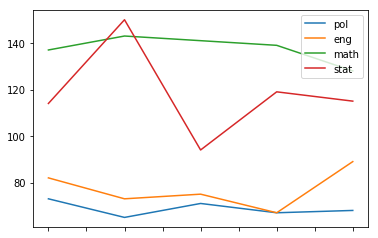

In [108]:
gre_scores.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019606457240>,
      dtype=object)

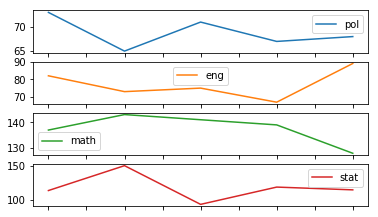

In [109]:
gre_scores.plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019607819CF8>,
      dtype=object)

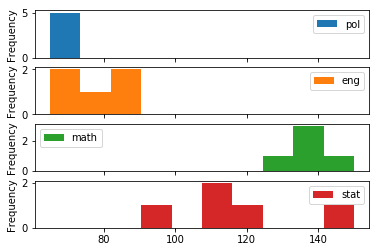

In [110]:
gre_scores.plot.hist(subplots = True)

散点图

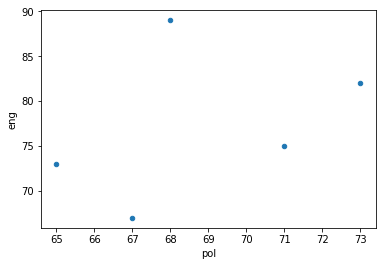

In [111]:
gre_scores.plot.scatter(x='pol',y='eng')

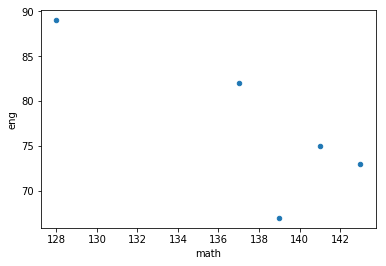

In [112]:
gre_scores.plot.scatter(x='math',y='eng')

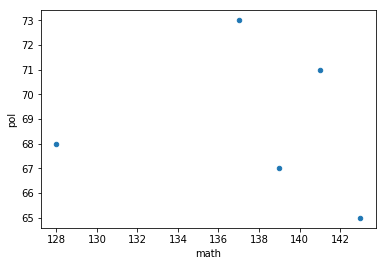

In [113]:
gre_scores.plot.scatter(x='math',y='pol')

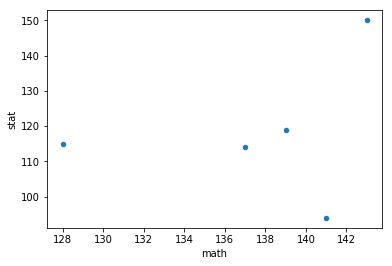

In [114]:
gre_scores.plot.scatter(x='math',y='stat')

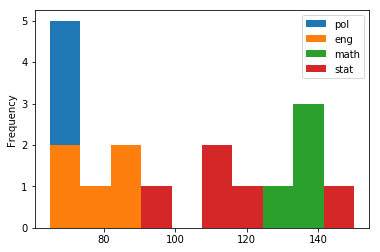

In [115]:
gre_scores.plot.hist()

柱形图

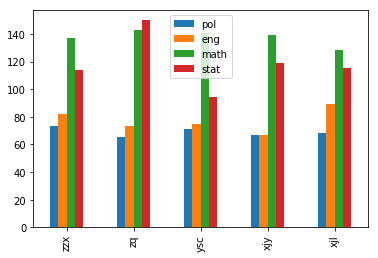

In [116]:
gre_scores.plot.bar()

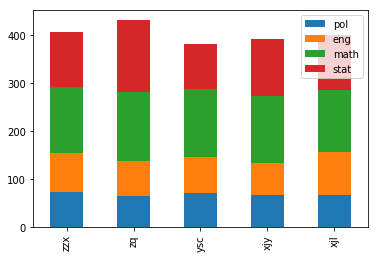

In [117]:
gre_scores.plot.bar(stacked = True)

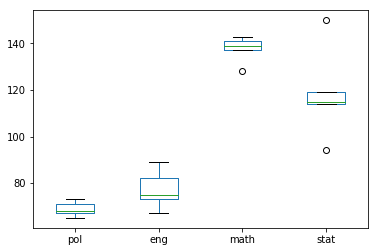

In [118]:
gre_scores.plot.box()

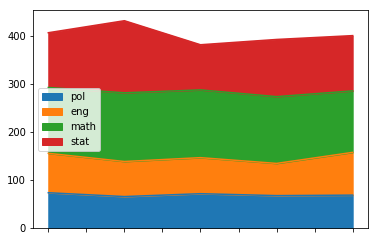

In [119]:
gre_scores.plot.area()

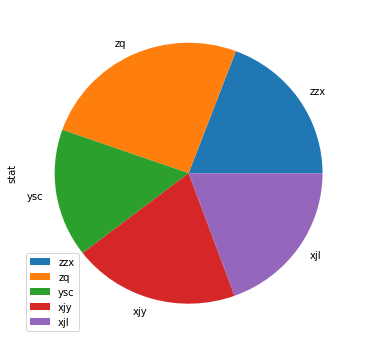

In [120]:
gre_scores.plot.pie(y='stat',figsize= (6,6))

In [124]:
gre_scores.T

,zzx,zq,ysc,xjy,xjl
name,zzx,zq,ysc,xjy,xjl
pol,73,65,71,67,68
eng,82,73,75,67,89
math,137,143,141,139,128
stat,114,150,94,119,115


##  shape

In [127]:
gre_scores.shape

(5, 5)

In [128]:
pd.DataFrame(gre_scores.values.reshape(25,1))

,0
0,zzx
1,73
2,82
3,137
4,114
5,zq
6,65
7,73
8,143
9,150


## 透视表 

In [135]:
import pandas as pd
gre_scores = pd.DataFrame({
    'name':['zzx','zq','ysc','xjy','xjl'],
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115],
    'grade':[2015,2015,2015,2014,2014]
})
gre_scores

,name,pol,eng,math,stat,grade
0,zzx,73,82,137,114,2015
1,zq,65,73,143,150,2015
2,ysc,71,75,141,94,2015
3,xjy,67,67,139,119,2014
4,xjl,68,89,128,115,2014


In [138]:
gre_scores.pivot(index='name',columns='grade',values= ['math','stat'])

math          stat       
grade   2014   2015   2014   2015
name                             
xjl    128.0    NaN  115.0    NaN
xjy    139.0    NaN  119.0    NaN
ysc      NaN  141.0    NaN   94.0
zq       NaN  143.0    NaN  150.0
zzx      NaN  137.0    NaN  114.0

In [137]:
gre_scores.pivot(index='name',columns='grade')

pol         eng         math          stat       
grade  2014  2015  2014  2015   2014   2015   2014   2015
name                                                     
xjl    68.0   NaN  89.0   NaN  128.0    NaN  115.0    NaN
xjy    67.0   NaN  67.0   NaN  139.0    NaN  119.0    NaN
ysc     NaN  71.0   NaN  75.0    NaN  141.0    NaN   94.0
zq      NaN  65.0   NaN  73.0    NaN  143.0    NaN  150.0
zzx     NaN  73.0   NaN  82.0    NaN  137.0    NaN  114.0